<a href="https://colab.research.google.com/github/JSJeong-me/Irostyle/blob/main/2_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install -U pandas-profiling==3.1.0

In [2]:
#import pandas_profiling

In [3]:
# !pip install seaborn

In [4]:
import os

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dir_path = r'./'

In [7]:
data = pd.read_excel('feets-old.xlsx', skiprows=0, header=1 )

In [8]:
# data['Unnamed: 0']

In [9]:
data.drop('Unnamed: 0', axis=1,inplace=True)

In [10]:
data.columns

Index(['foot_length', 'foot_width', 'ball_distance', 'ball_height',
       'ball_girth', 'instep_height', 'instep_girth', 'big_toe_height',
       'heel_height', 'heel_width', 'inner_ankle_bone_height',
       'outer_ankle_bone_height', 'ankle_height', 'ankle_hor_girth',
       'ankle_ver_girth', 'ankle_length', 'ankle_width',
       'heel_to_inner_ball_distance', 'heel_to_outer_ball_distance',
       'heel_to_ankle_hor_distance', 'heel_to_ankle_girth',
       'heel_to_instep_girth', 'big_toe_angle', 'arch_height', 'foot_length.1',
       'foot_width.1', 'ball_distance.1', 'ball_height.1', 'ball_girth.1',
       'instep_height.1', 'instep_girth.1', 'big_toe_height.1',
       'heel_height.1', 'heel_width.1', 'inner_ankle_bone_height.1',
       'outer_ankle_bone_height.1', 'ankle_height.1', 'ankle_hor_girth.1',
       'ankle_ver_girth.1', 'ankle_length.1', 'ankle_width.1',
       'heel_to_inner_ball_distance.1', 'heel_to_outer_ball_distance.1',
       'heel_to_ankle_hor_distance.1', 'hee

In [11]:
foot_L = data.iloc[:, 0:24]

In [12]:
len(foot_L.columns)

24

In [13]:
df = foot_L.corr(method='pearson')


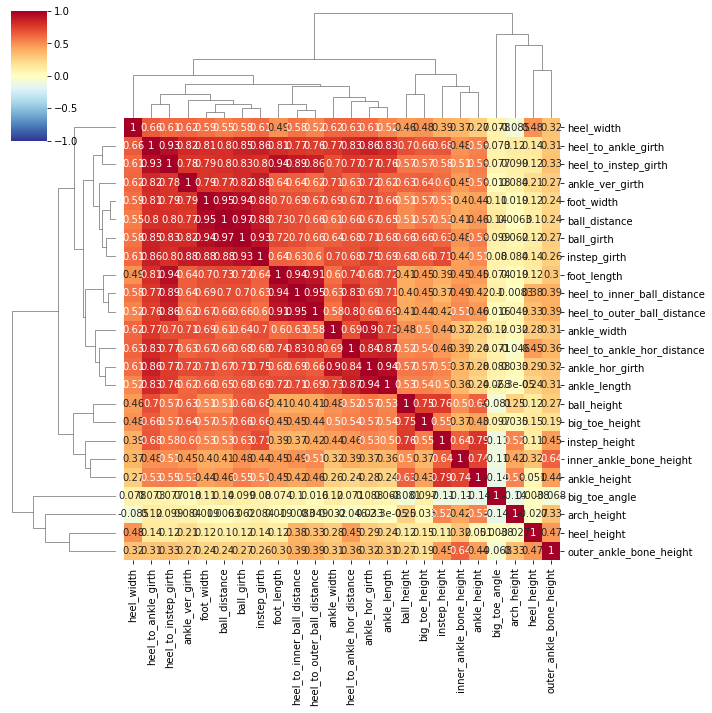

In [14]:
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


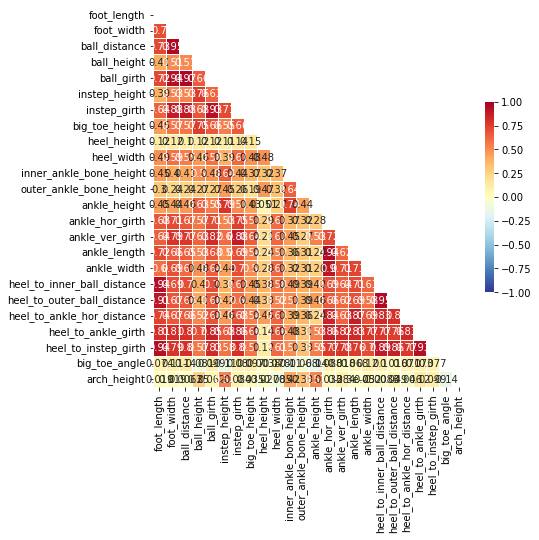

In [15]:
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()